## **EARLY PREDICTION OF CHRONIC KIDNEY DISEASE**

IMPORT LIBRARIES


In [1]:
import pandas as pd
import numpy as np
#from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

import sklearn.preprocessing as preprocessing

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.preprocessing import StandardScaler, LabelEncoder

import pickle

READ THE DATASET

In [2]:
data=pd.read_csv("/content/chronickidneydisease.csv")

Understanding Data Type And Summary Of Features

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [5]:
desc_stats = data.describe()
print(desc_stats)


               id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006 

In [6]:
#REMOVE UNNESSARY COLUMN
data.drop(['id'],axis=1,inplace=True)

In [7]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
#Changing the column names
data.columns=['age','blood_pressure','specified_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria','blood_glucose_random',"blood_urea",'serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension','diabetesmellitus','coronary_artery disease','appetite','pedal_edema','anemia','class']
data.columns

Index(['age', 'blood_pressure', 'specified_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specified_gravity        353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [10]:
##target column
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [11]:
data['class']=data['class'].replace("ckd\t","ckd")
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

Ratio of CKD and NON-CKD persons in the DATASET

In [12]:

# Count the occurrences of each class
class_counts = data['class'].value_counts()

# Calculate the ratio of CKD to non-CKD
ckd_count = class_counts.get('ckd', 0)
non_ckd_count = class_counts.get('notckd', 0)

ckd_ratio = ckd_count / (ckd_count + non_ckd_count)
non_ckd_ratio = non_ckd_count / (ckd_count + non_ckd_count)

print(f'CKD Count: {ckd_count}')
print(f'Non-CKD Count: {non_ckd_count}')
print(f'CKD Ratio: {ckd_ratio:.2f}')
print(f'Non-CKD Ratio: {non_ckd_ratio:.2f}')


CKD Count: 250
Non-CKD Count: 150
CKD Ratio: 0.62
Non-CKD Ratio: 0.38


In [13]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'anemia', 'pus_cell', 'white_blood_cell_count', 'class', 'red_blood_cells', 'red_blood_cell_count', 'bacteria', 'packed_cell_volume', 'hypertension', 'pedal_edema', 'diabetesmellitus', 'pus_cell_clumps', 'appetite', 'coronary_artery disease'}


In [14]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'anemia', 'pus_cell', 'class', 'red_blood_cells', 'bacteria', 'hypertension', 'pedal_edema', 'diabetesmellitus', 'pus_cell_clumps', 'appetite', 'coronary_artery disease'}


In [15]:
for i in catcols:
  print("continous columns: ",i)
  print(data[i])
  print('*'*120+'\n')

continous columns:  anemia
0       no
1       no
2      yes
3      yes
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: anemia, Length: 400, dtype: object
************************************************************************************************************************

continous columns:  pus_cell
0        normal
1        normal
2        normal
3      abnormal
4        normal
         ...   
395      normal
396      normal
397      normal
398      normal
399      normal
Name: pus_cell, Length: 400, dtype: object
************************************************************************************************************************

continous columns:  class
0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: class, Length: 400, dtype: object
***************************************************************************************************

In [16]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'albumin', 'sodium', 'sugar', 'specified_gravity', 'blood_urea', 'serum_creatinine', 'potassium', 'age', 'blood_glucose_random', 'blood_pressure', 'hemoglobin'}


In [17]:
for i in contcols:
  print("continous columns: ",i)
  print(data[i])
  print('*'*120+'\n')

continous columns:  albumin
0      1.0
1      4.0
2      2.0
3      4.0
4      2.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: albumin, Length: 400, dtype: float64
************************************************************************************************************************

continous columns:  sodium
0        NaN
1        NaN
2        NaN
3      111.0
4        NaN
       ...  
395    150.0
396    141.0
397    137.0
398    135.0
399    141.0
Name: sodium, Length: 400, dtype: float64
************************************************************************************************************************

continous columns:  sugar
0      0.0
1      0.0
2      3.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: sugar, Length: 400, dtype: float64
************************************************************************************************************************

continous columns:  specified_gravity
0   

In [18]:
contcols = list(contcols)  # Convert Index object to a list
contcols.remove('specified_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

['sodium', 'blood_urea', 'serum_creatinine', 'potassium', 'age', 'blood_glucose_random', 'blood_pressure', 'hemoglobin']


In [19]:
catcols.add('specified_gravity')
catcols.add('albumin')
catcols.add('sugar')

In [20]:
contcols = list(contcols)
contcols.append('white_blood_cell_count') # Use append to add items to a list
contcols.append('packed_cell_volume')
contcols.append('red_blood_cell_count')
print(contcols)

['sodium', 'blood_urea', 'serum_creatinine', 'potassium', 'age', 'blood_glucose_random', 'blood_pressure', 'hemoglobin', 'white_blood_cell_count', 'packed_cell_volume', 'red_blood_cell_count']


In [21]:
data['coronary_artery disease'] = data['coronary_artery disease'].replace('\tno', 'no') # Assuming the column name is 'coronary_artery_disease'
print(data['coronary_artery disease']) # Use print() to display the column data

0      no
1      no
2      no
3      no
4      no
       ..
395    no
396    no
397    no
398    no
399    no
Name: coronary_artery disease, Length: 400, dtype: object


In [22]:
data['diabetesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno': 'no','\tyes':'yes','yes':'yes'}) # Assuming the column name is 'coronary_artery_disease'
print(data['diabetesmellitus'])

0      yes
1       no
2      yes
3       no
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: diabetesmellitus, Length: 400, dtype: object


Handling The Missing Values

DETECTING THE NULL VALUES

In [23]:
#null values
data.isnull().any()

age                         True
blood_pressure              True
specified_gravity           True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [24]:
data.isnull().sum()

age                          9
blood_pressure              12
specified_gravity           47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [25]:
data.packed_cell_volume=pd.to_numeric(data.packed_cell_volume,errors='coerce')
data.white_blood_cell_count=pd.to_numeric(data.white_blood_cell_count,errors='coerce')
data.red_blood_cell_count=pd.to_numeric(data.red_blood_cell_count,errors='coerce')

**Replacing The Missing Values**

We can replace the missing values by mean, median or mode by using fillna method.

In [26]:
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery disease'].fillna(data['coronary_artery disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specified_gravity'].fillna(data['specified_gravity'].mode()[0],inplace=True)

**Label Encoding**

In [27]:
for i in catcols:
  print("label encoding of:",i)
  LEi=LabelEncoder()
  print(data[i])
  data[i]=LEi.fit_transform(data[i])
  print(data[i])
  print('*'*100)

label encoding of: anemia
0       no
1       no
2      yes
3      yes
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: anemia, Length: 400, dtype: object
0      0
1      0
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: anemia, Length: 400, dtype: int64
****************************************************************************************************
label encoding of: pus_cell
0        normal
1        normal
2        normal
3      abnormal
4        normal
         ...   
395      normal
396      normal
397      normal
398      normal
399      normal
Name: pus_cell, Length: 400, dtype: object
0      1
1      1
2      1
3      0
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: pus_cell, Length: 400, dtype: int64
****************************************************************************************************
label encoding of: albumin
0      1.0
1      4.0
2      2.0
3      4.0
4      2.0
 

In [28]:
data

,age,blood_pressure,specified_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,3,1,0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,2,0,0,0,0,0
1,7.0,50.0,3,4,0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,1,0,0,0,0,0
2,62.0,80.0,1,2,3,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,2,0,1,0,1,0
3,48.0,70.0,0,4,0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,1,0,1,1,1,0
4,51.0,80.0,1,2,0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,3,0,0,1,1,0,0,140.000000,...,47.0,6700.0,4.900000,0,1,0,0,0,0,1
396,42.0,70.0,4,0,0,1,1,0,0,75.000000,...,54.0,7800.0,6.200000,0,1,0,0,0,0,1
397,12.0,80.0,3,0,0,1,1,0,0,100.000000,...,49.0,6600.0,5.400000,0,1,0,0,0,0,1
398,17.0,60.0,4,0,0,1,1,0,0,114.000000,...,51.0,7200.0,5.900000,0,1,0,0,0,0,1


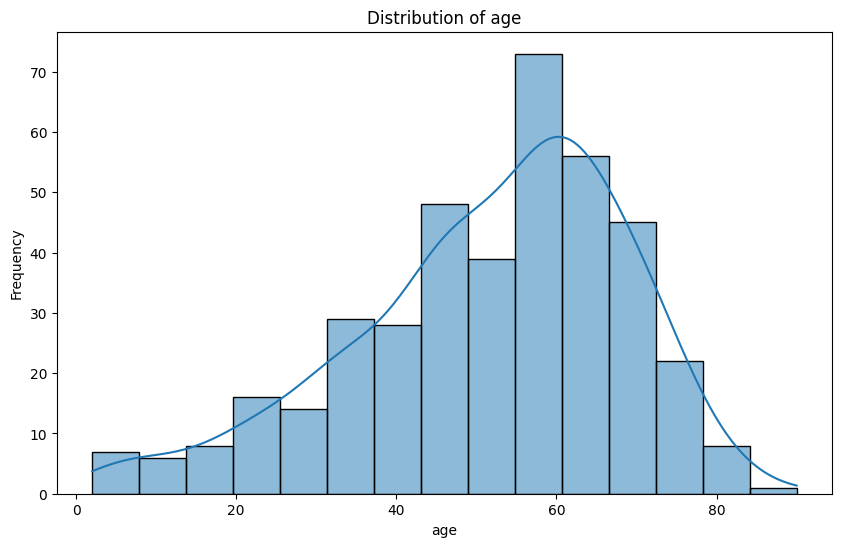

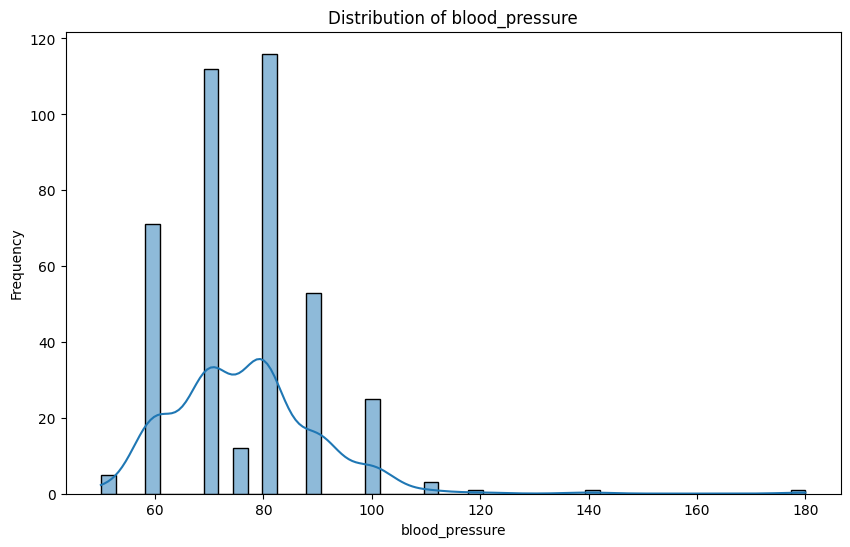

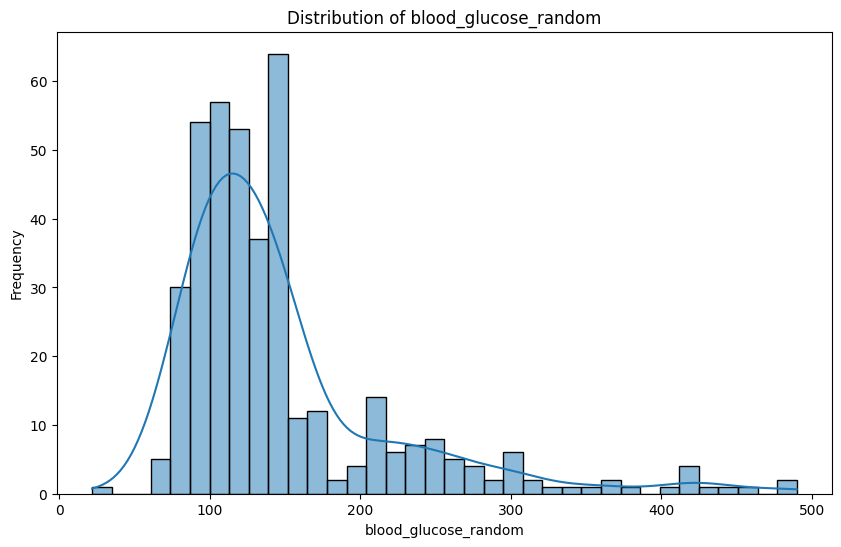

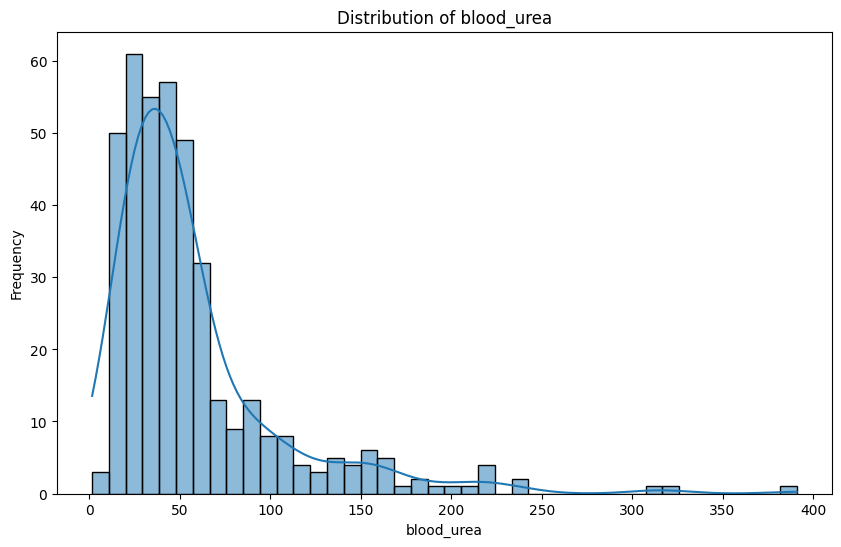

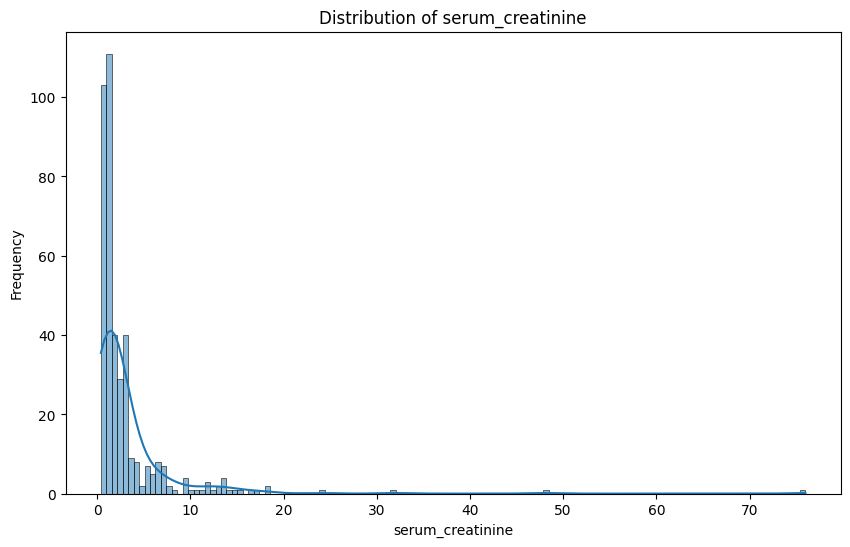

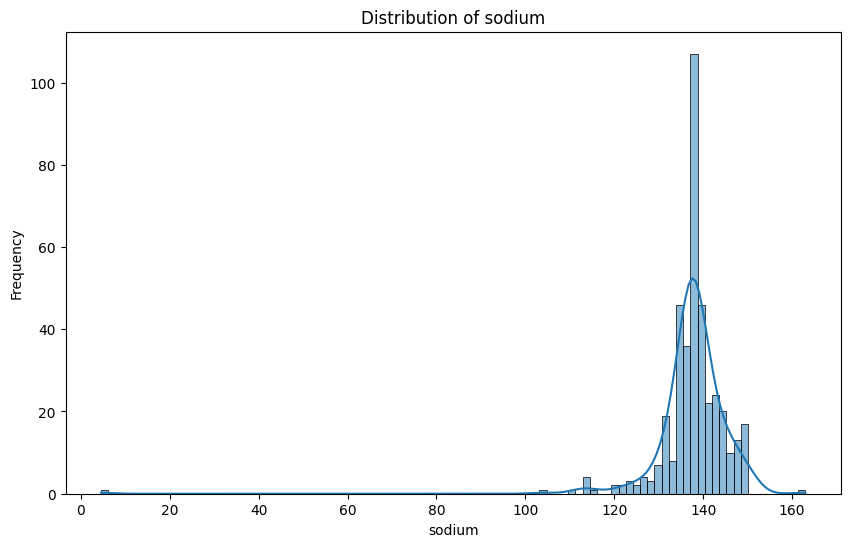

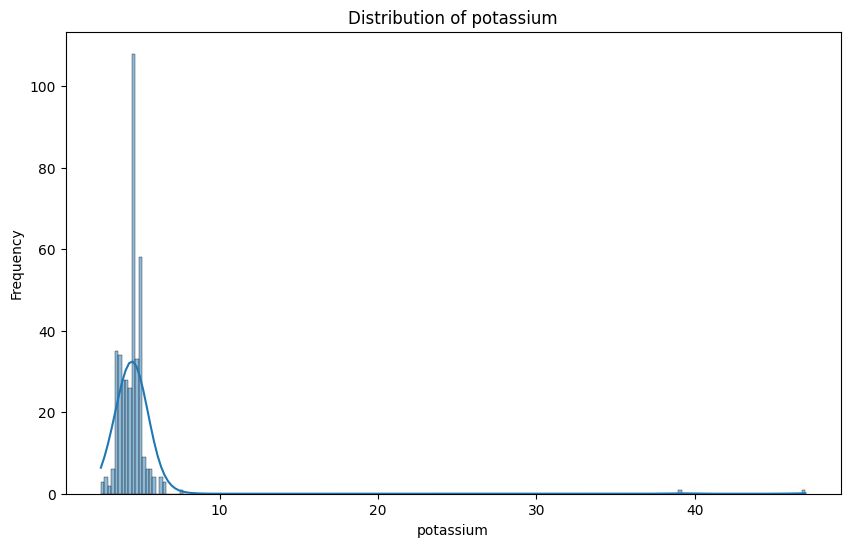

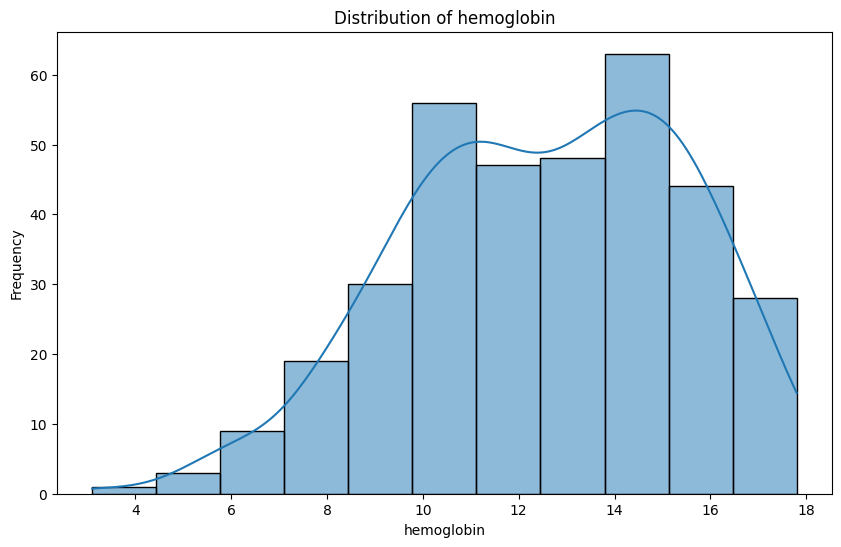

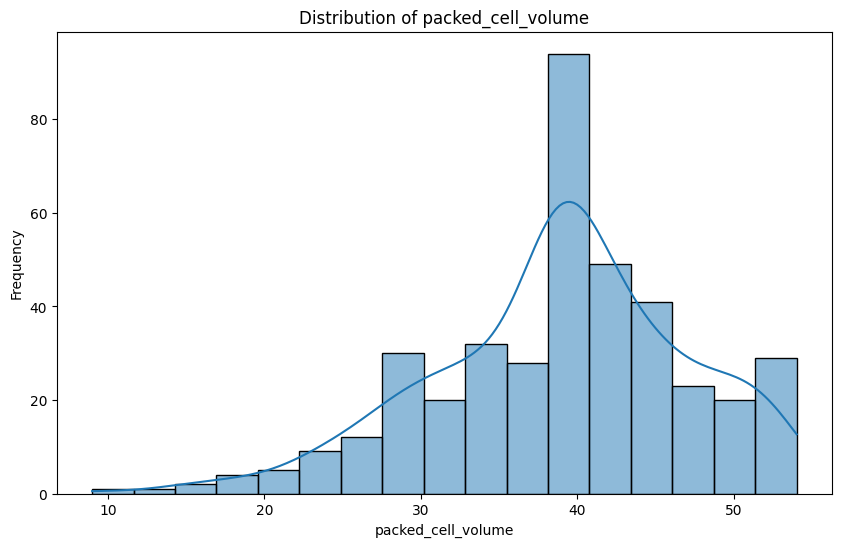

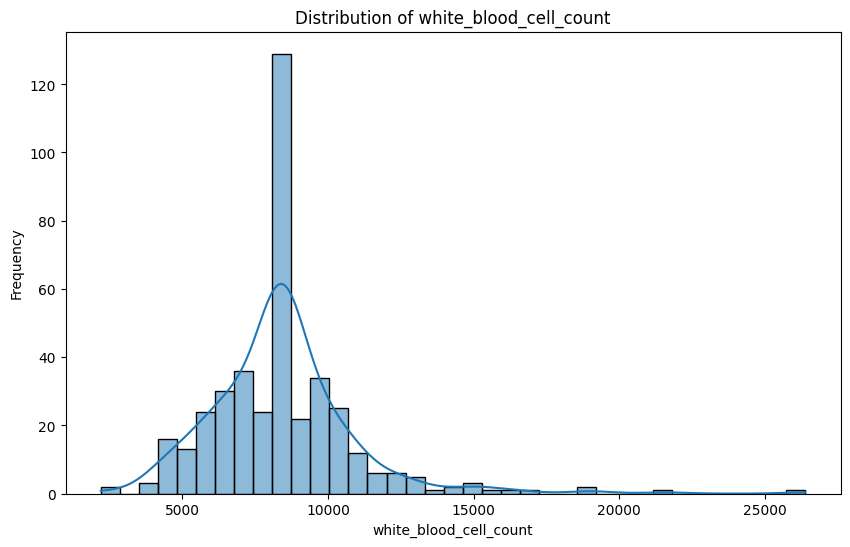

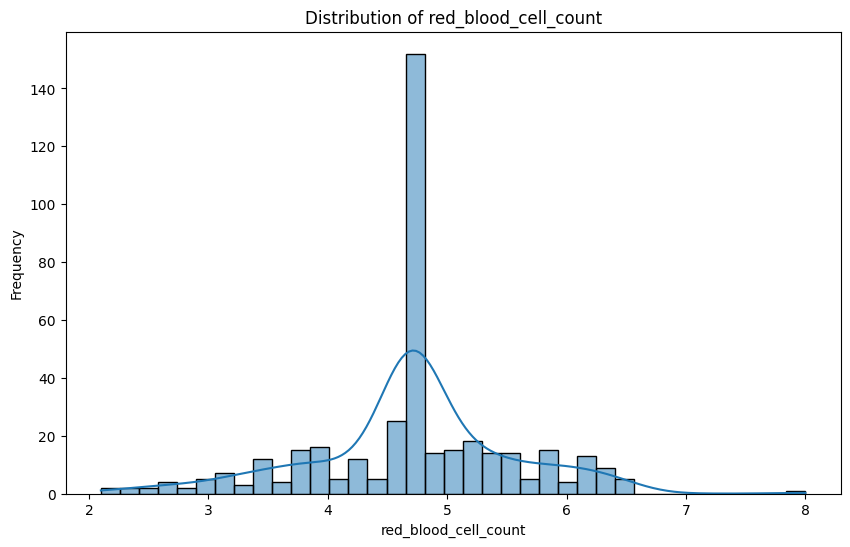

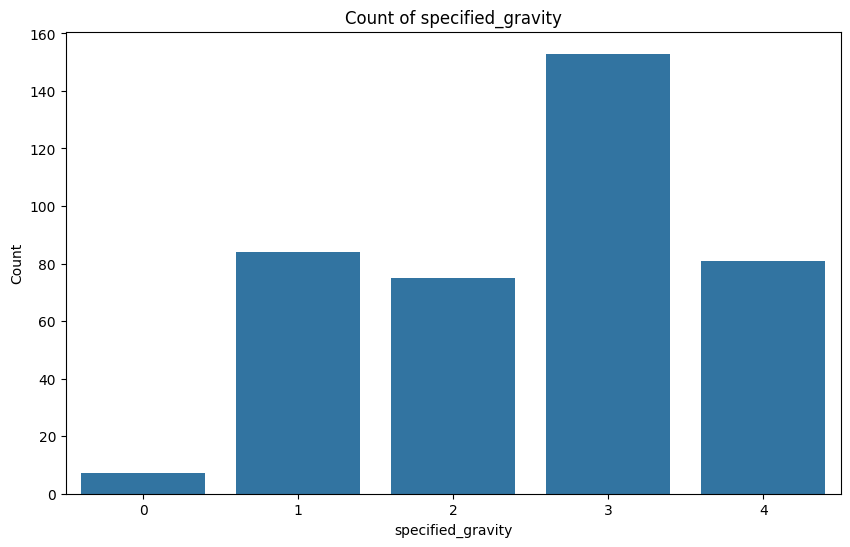

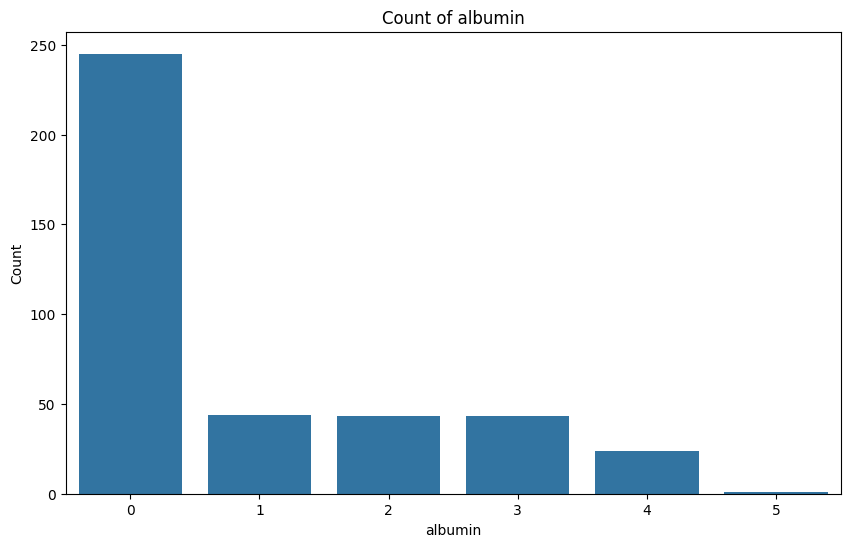

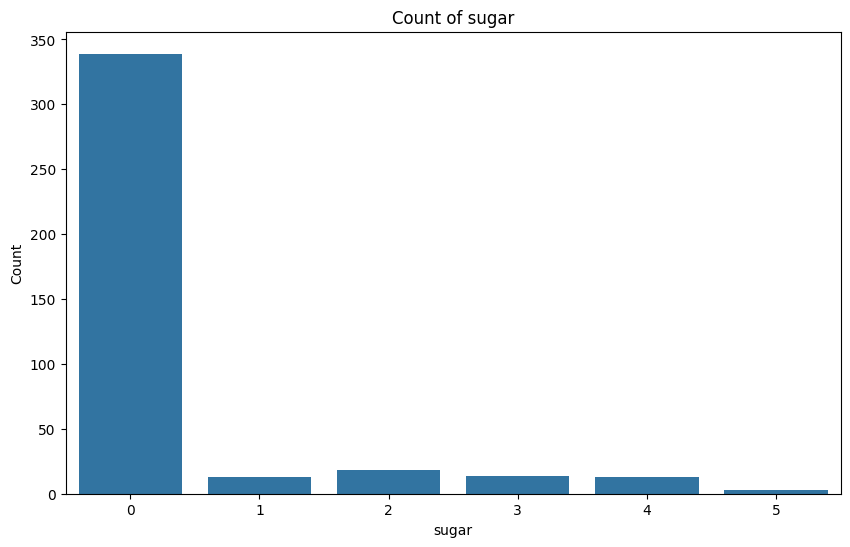

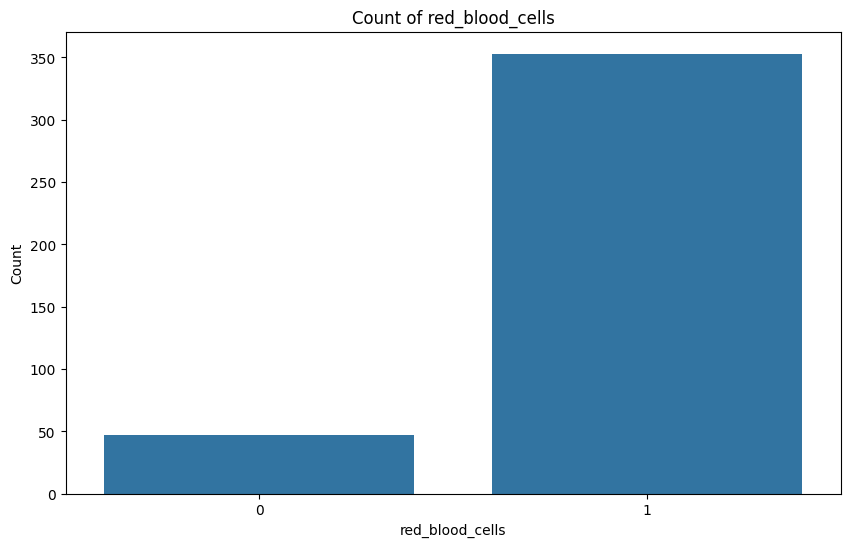

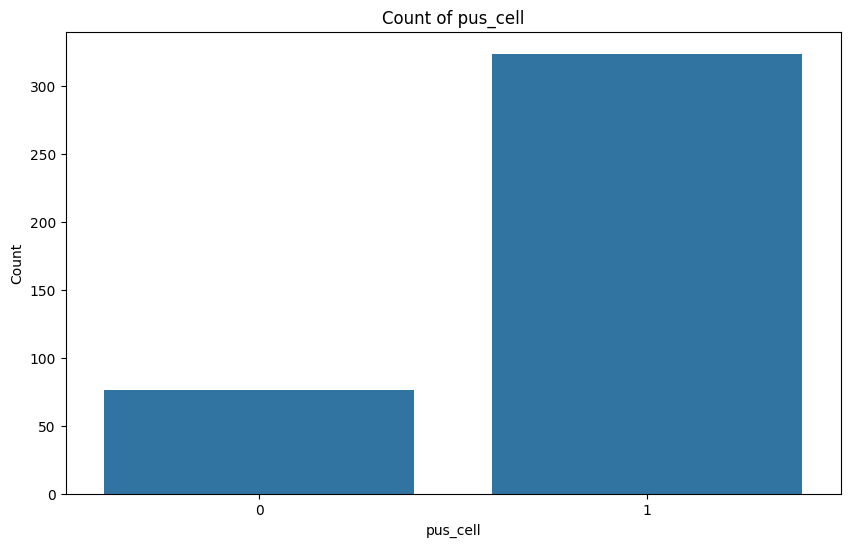

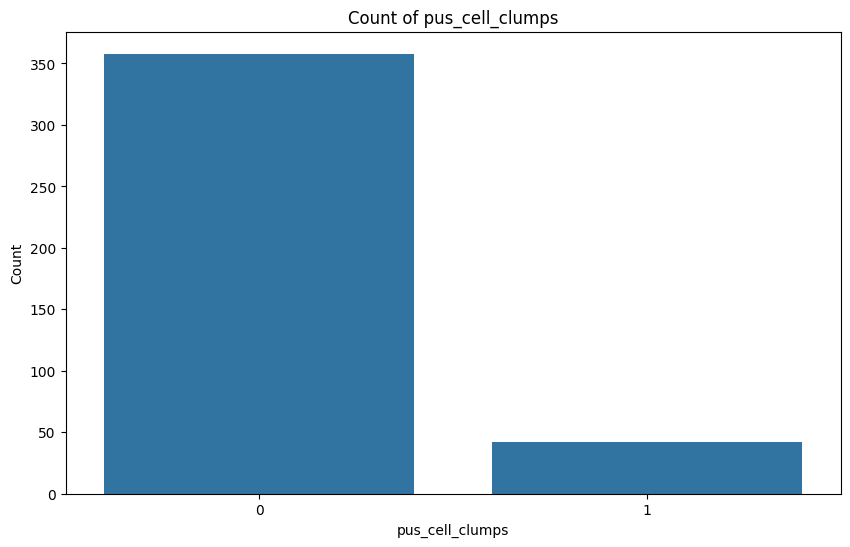

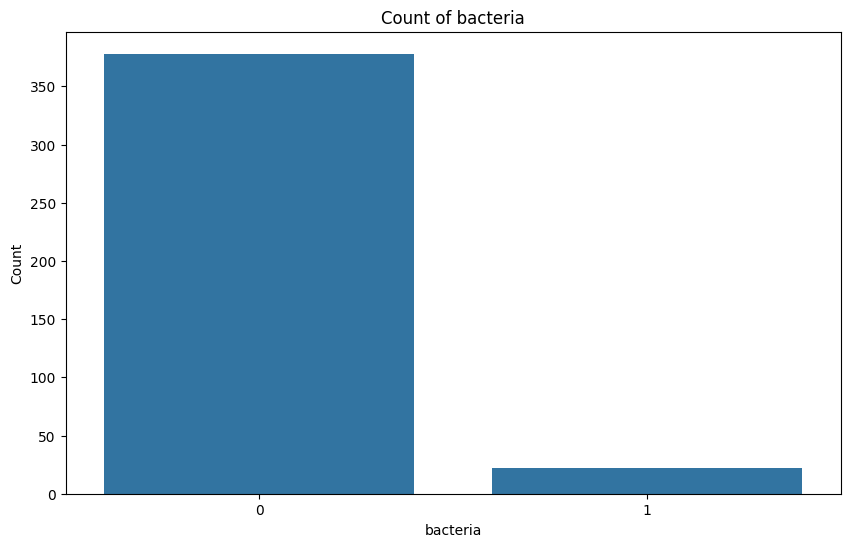

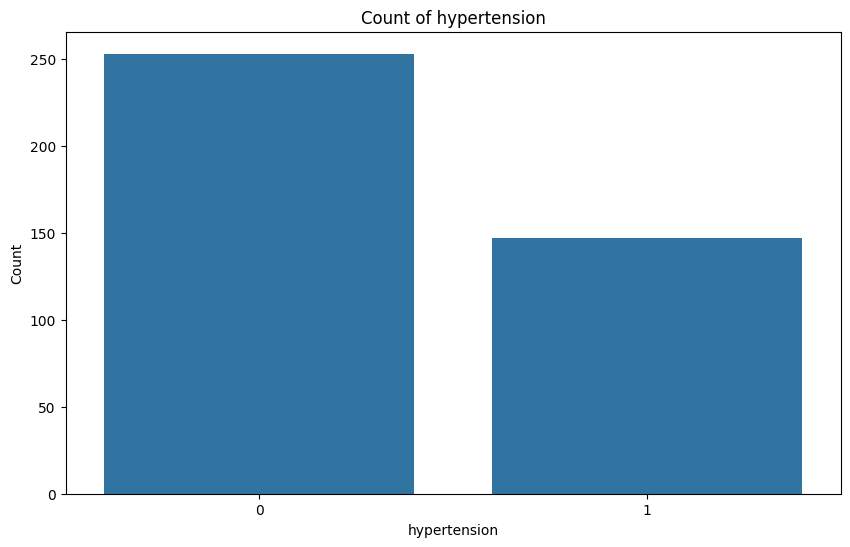

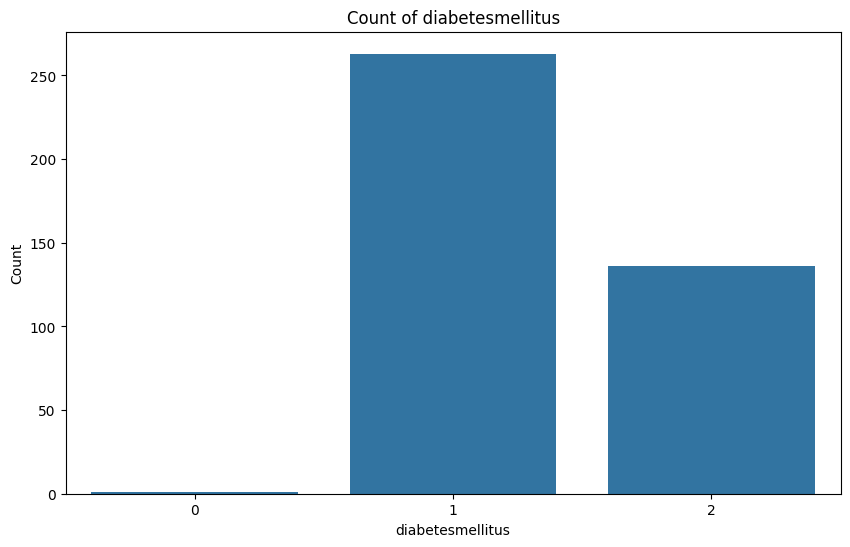

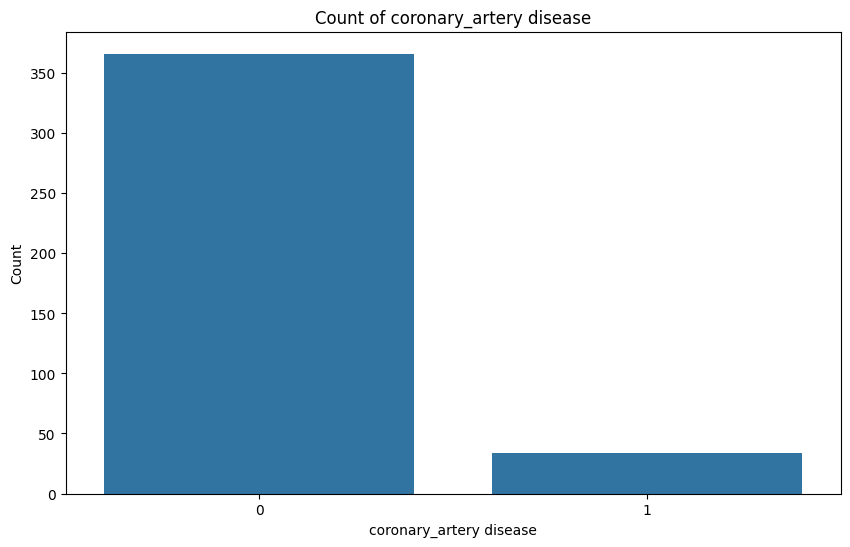

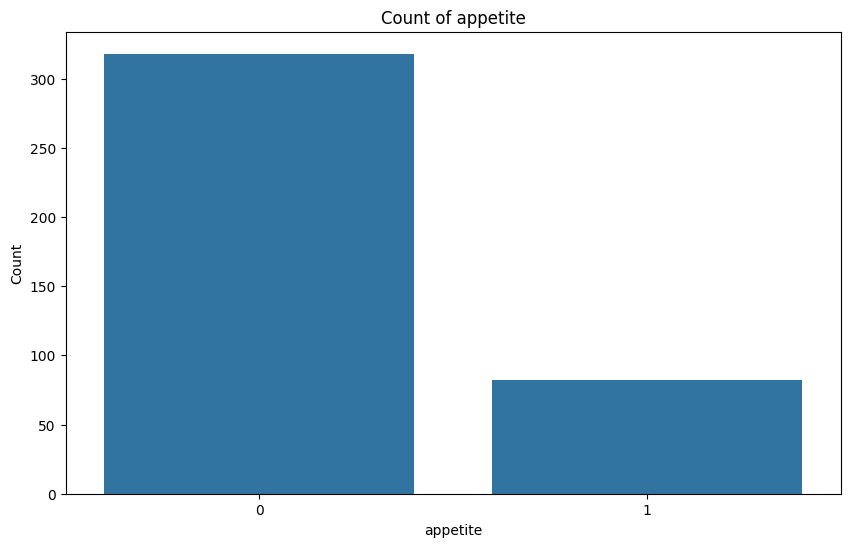

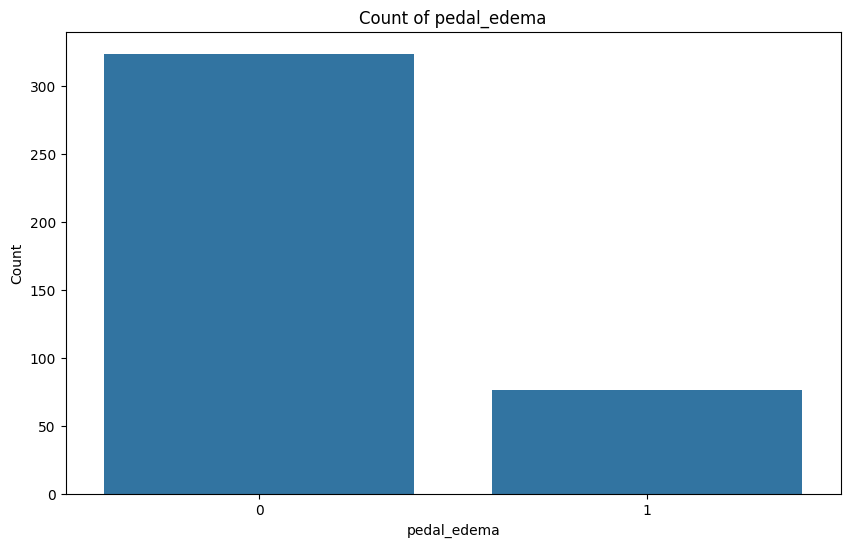

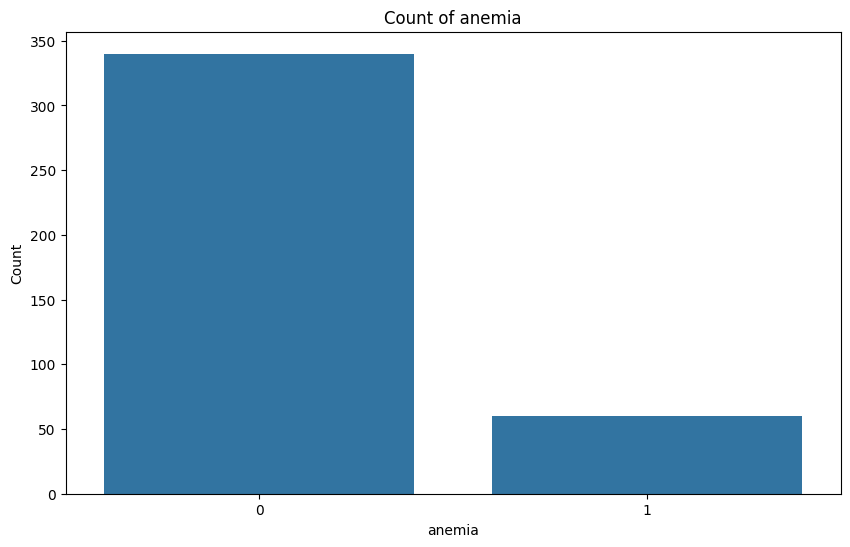

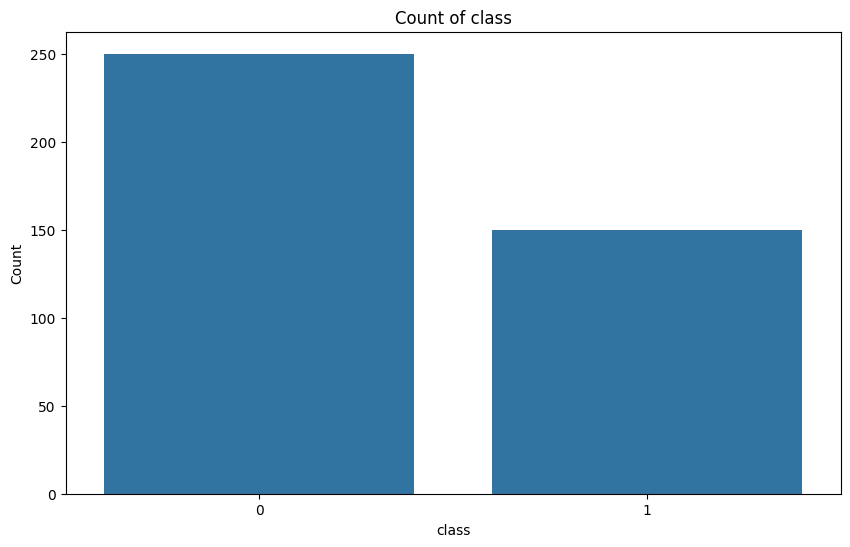

In [34]:
# Univariate analysis for numerical columns
numerical_columns = ['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea',
                     'serum_creatinine', 'sodium', 'potassium', 'hemoglobin',
                     'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Univariate analysis for categorical columns
categorical_columns = ['specified_gravity', 'albumin', 'sugar', 'red_blood_cells',
                       'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension',
                       'diabetesmellitus', 'coronary_artery disease', 'appetite',
                       'pedal_edema', 'anemia', 'class']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


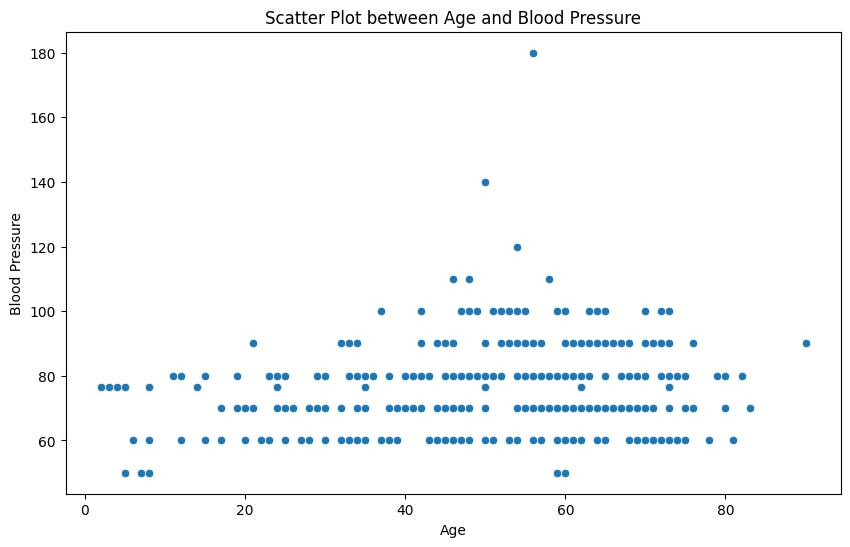

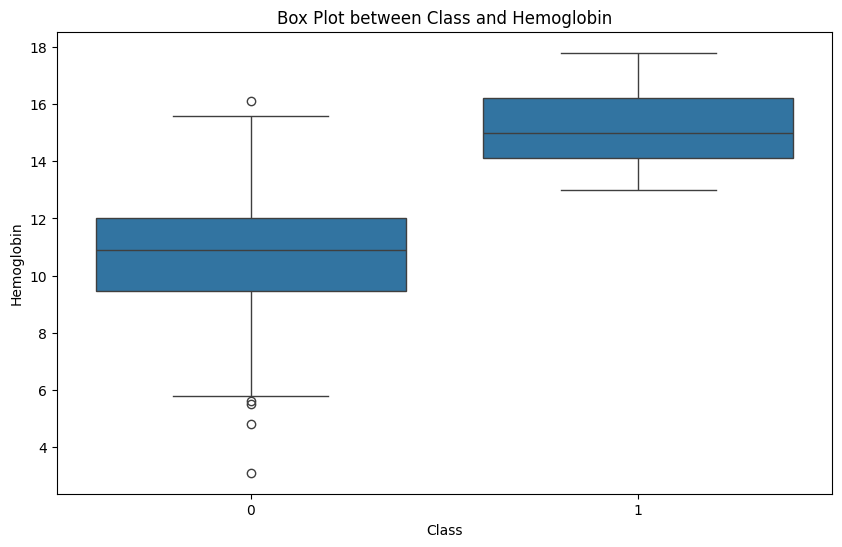

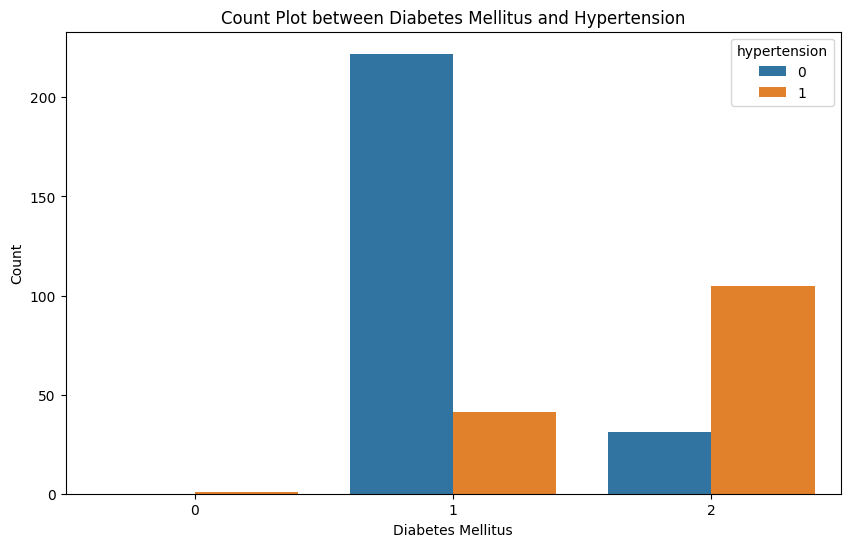

In [36]:
# Bivariate analysis between two numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='blood_pressure', data=data)
plt.title('Scatter Plot between Age and Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

# Bivariate analysis between a numerical and a categorical variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='hemoglobin', data=data)
plt.title('Box Plot between Class and Hemoglobin')
plt.xlabel('Class')
plt.ylabel('Hemoglobin')
plt.show()

# Bivariate analysis between two categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetesmellitus', hue='hypertension', data=data)
plt.title('Count Plot between Diabetes Mellitus and Hypertension')
plt.xlabel('Diabetes Mellitus')
plt.ylabel('Count')
plt.show()


<Figure size 1200x1000 with 0 Axes>

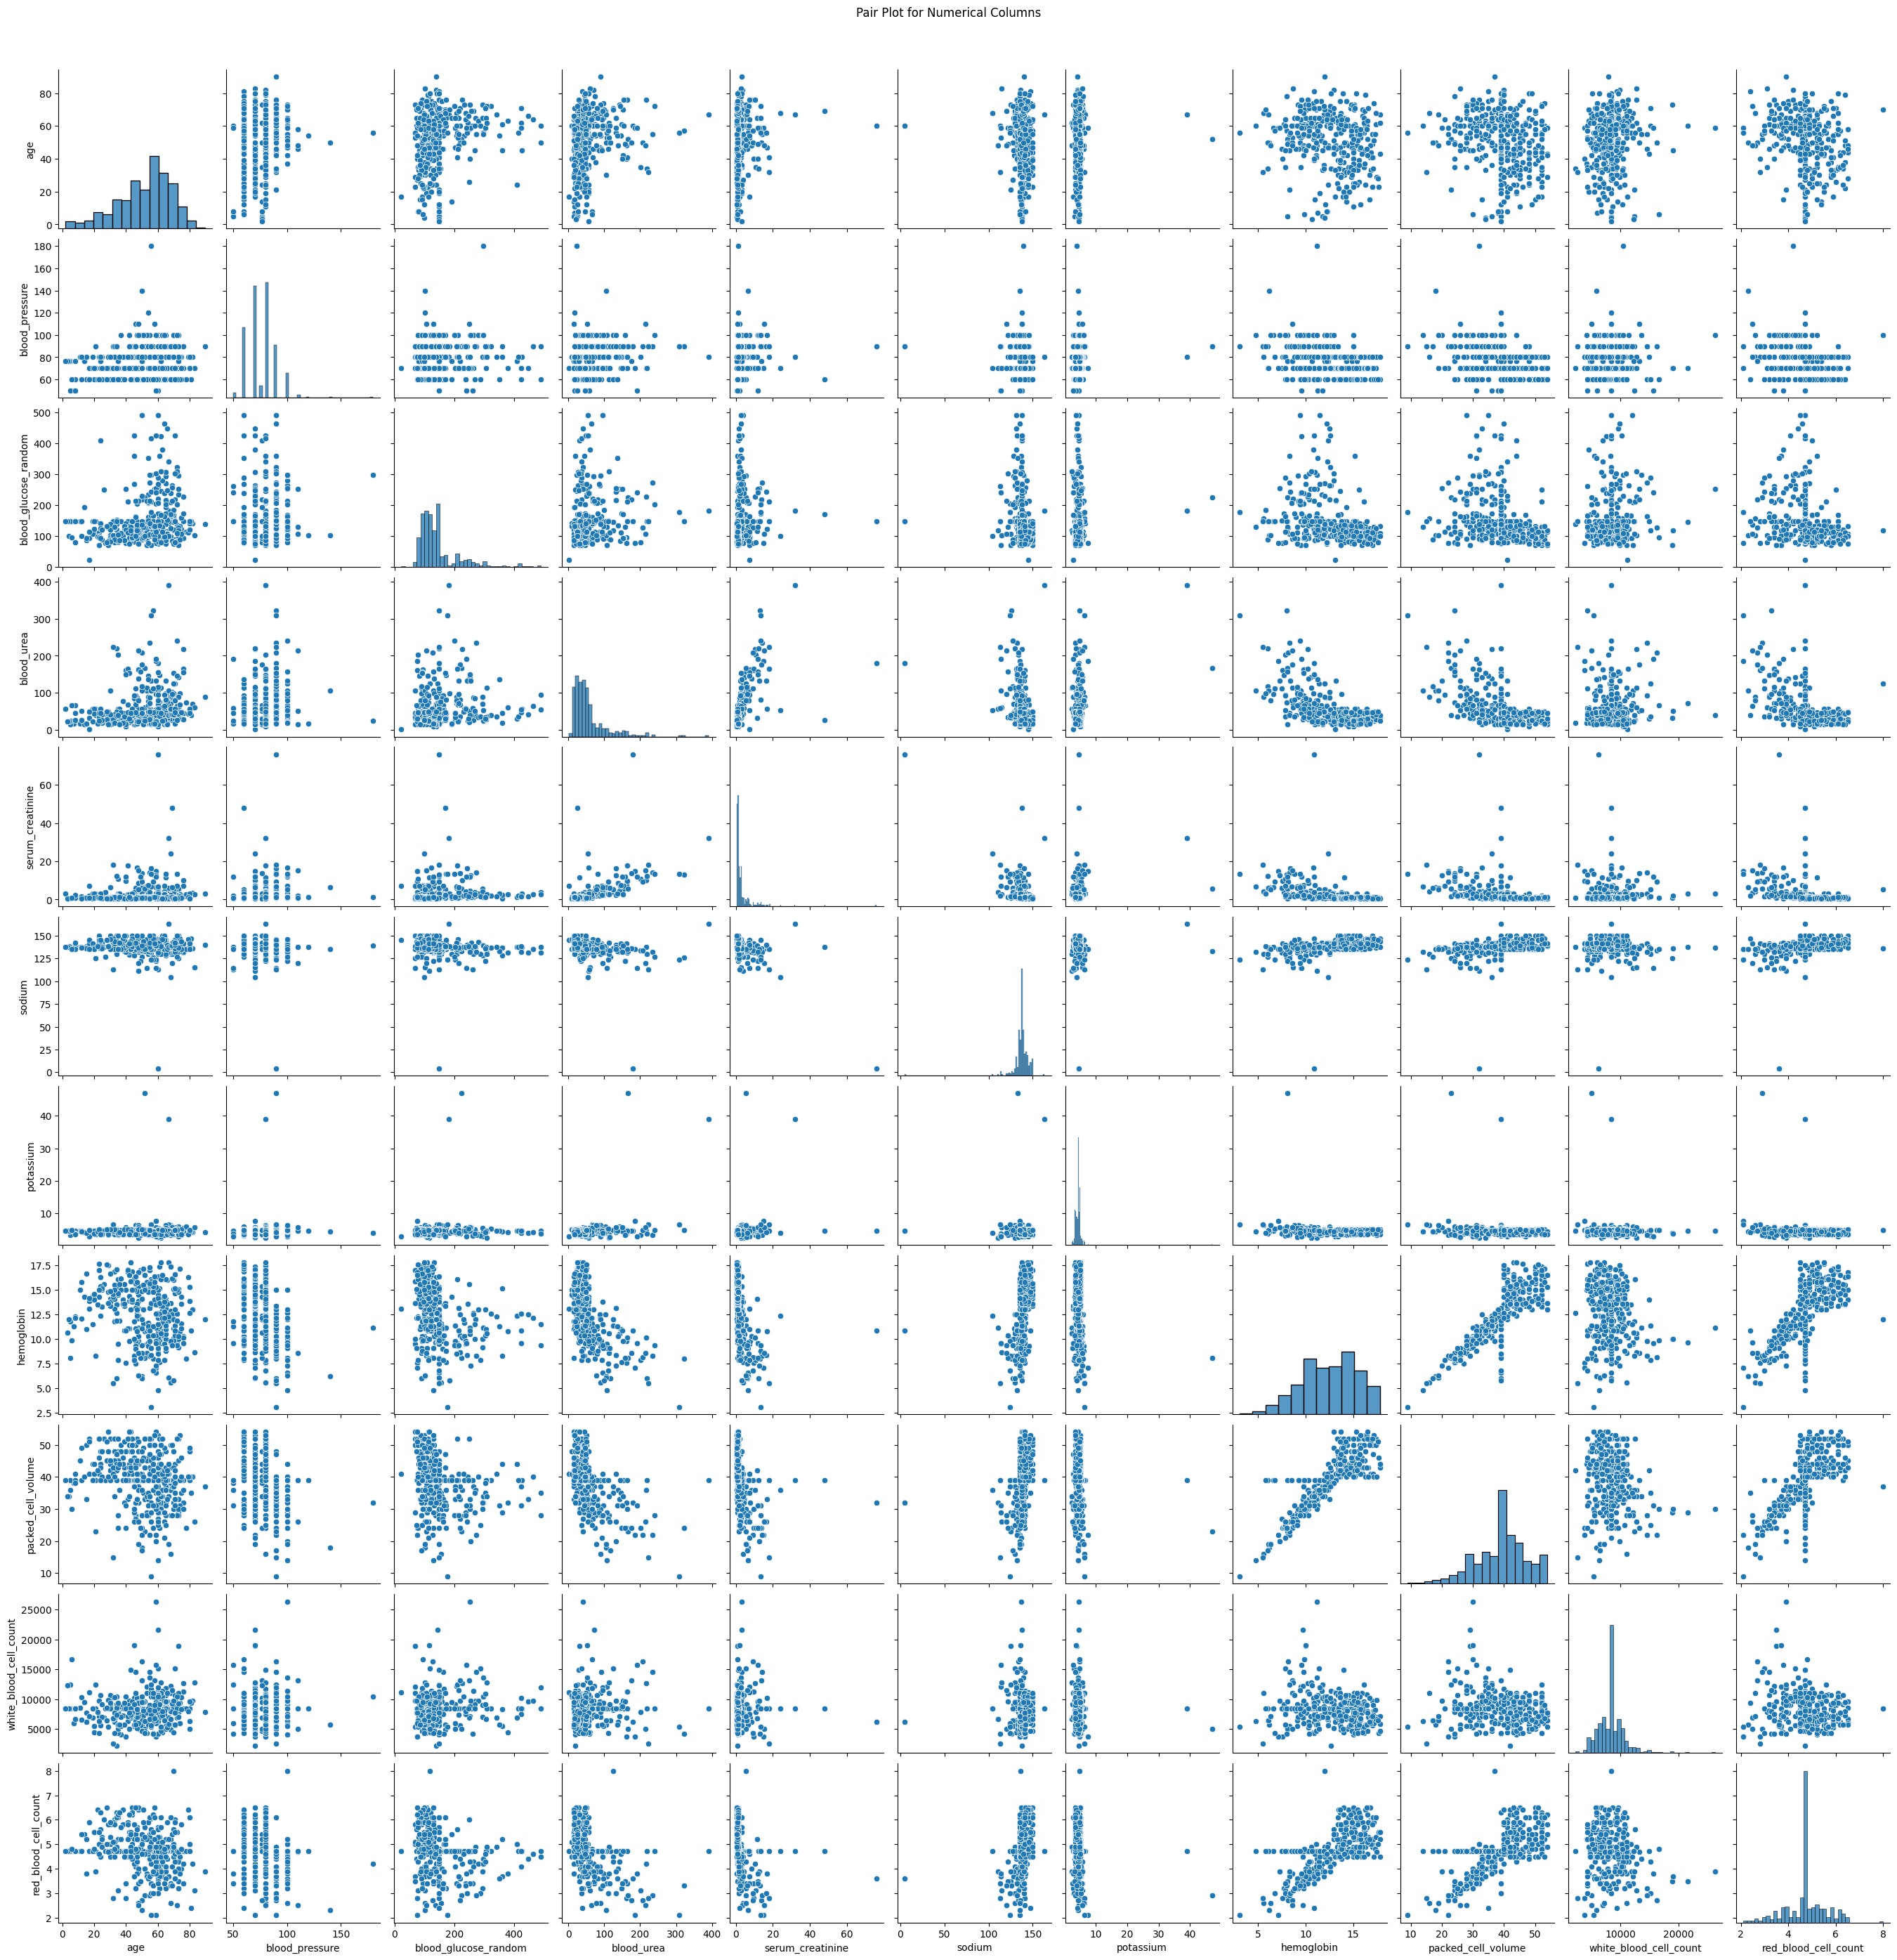

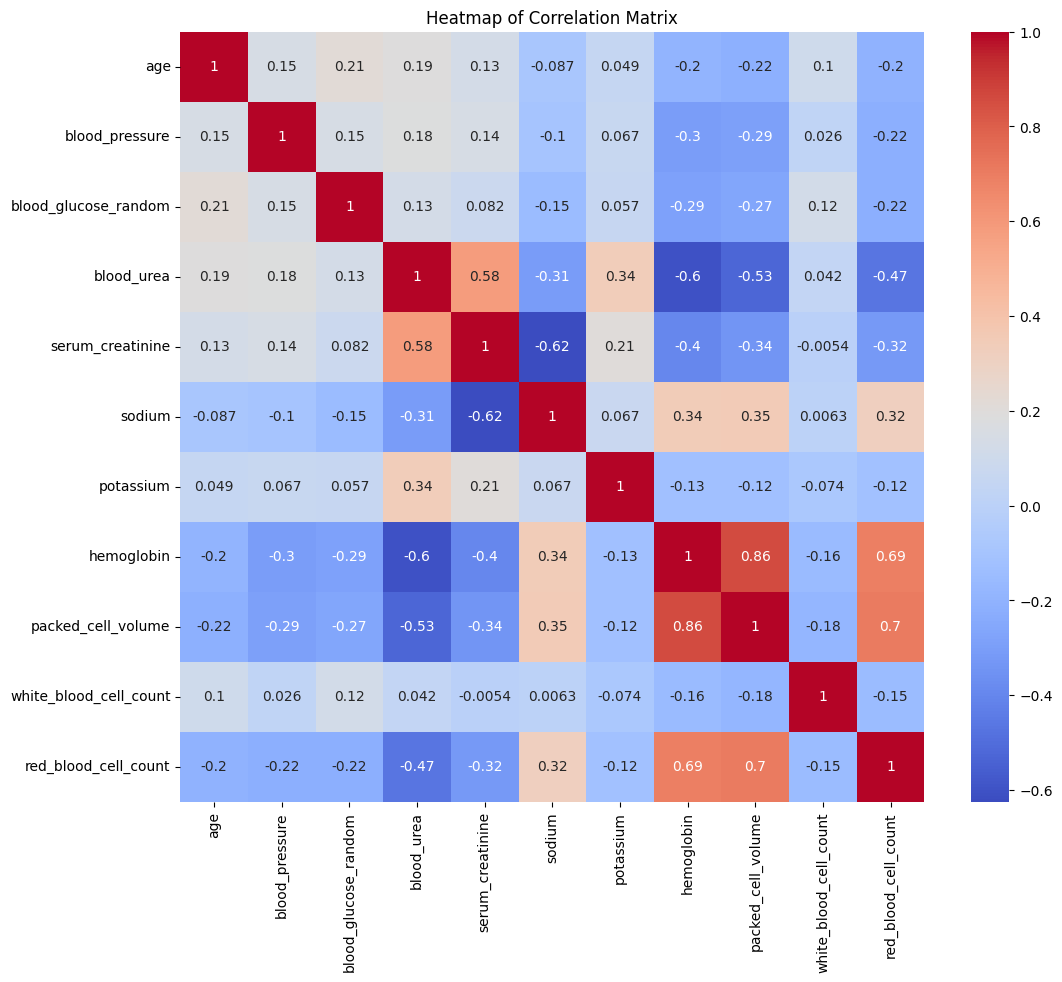

In [ ]:
# Multivariate analysis using pair plot for numerical variables
plt.figure(figsize=(12, 10))
sns.pairplot(data[numerical_columns])
plt.suptitle('Pair Plot for Numerical Columns', y=1.02)
plt.show()

# Multivariate analysis using heatmap for correlation
plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Multivariate analysis using a pair plot with a categorical hue
plt.figure(figsize=(12, 10))
sns.pairplot(data, hue='class')
plt.suptitle('Pair Plot with Class Hue', y=1.02)
plt.show()


Splitting The Dataset Into Dependent And Independent Variable

In [29]:
#creating independent and dependent variables
sel=['age','red_blood_cells','pus_cell','blood_glucose_random','blood_urea','pedal_edema','anemia',
     'diabetesmellitus','coronary_artery disease','blood_pressure']
x=pd.DataFrame(data,columns=sel)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 10)
(400, 1)


In [30]:
print(x.columns)

Index(['age', 'red_blood_cells', 'pus_cell', 'blood_glucose_random',
       'blood_urea', 'pedal_edema', 'anemia', 'diabetesmellitus',
       'coronary_artery disease', 'blood_pressure'],
      dtype='object')


DATA SPLITTING


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 10)
(80, 10)
(320, 1)
(80, 1)


**MODEL** **BUILDING**

ADA BOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

ada=AdaBoostClassifier()

ada.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
y_pred = ada.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')
print(classification_report(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame(ada.feature_importances_, index=x.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

Accuracy: 0.9875
Precision: 0.9629629629629629
Recall: 1.0
F1-Score: 0.9811320754716981
ROC-AUC: 0.9907407407407408
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.96      1.00      0.98        26

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

                         importance
blood_urea                     0.34
age                            0.22
blood_glucose_random           0.20
blood_pressure                 0.12
red_blood_cells                0.02
pus_cell                       0.02
pedal_edema                    0.02
anemia                         0.02
diabetesmellitus               0.02
coronary_artery disease        0.02


RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(x_train,y_train)

<ipython-input-105-5d99fddf6828>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
y_pred = model1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')
print(classification_report(y_test, y_pred))



Accuracy: 0.975
Precision: 0.9615384615384616
Recall: 0.9615384615384616
F1-Score: 0.9615384615384616
ROC-AUC: 0.9715099715099716
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.96      0.96      0.96        26

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
y_pred = model2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')
print(classification_report(y_test, y_pred))

Accuracy: 0.95
Precision: 0.9230769230769231
Recall: 0.9230769230769231
F1-Score: 0.9230769230769231
ROC-AUC: 0.9430199430199432
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.92      0.92      0.92        26

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
gra=GradientBoostingClassifier()
gra.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
y_pred = gra.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9625
Precision: 0.96
Recall: 0.9230769230769231
F1-Score: 0.9411764705882353
ROC-AUC: 0.9522792022792023
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.96      0.92      0.94        26

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [ ]:
import xgboost as xgb
xg=xgb.XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
y_pred = xg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')
print(classification_report(y_test, y_pred))

Accuracy: 0.95
Precision: 0.9230769230769231
Recall: 0.9230769230769231
F1-Score: 0.9230769230769231
ROC-AUC: 0.9430199430199432
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.92      0.92      0.92        26

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



In [ ]:
from sklearn.linear_model import LogisticRegression
mo = LogisticRegression()
mo.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
y_pred = mo.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9375
Precision: 0.8387096774193549
Recall: 1.0
F1-Score: 0.9122807017543859
ROC-AUC: 0.9537037037037037
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        54
           1       0.84      1.00      0.91        26

    accuracy                           0.94        80
   macro avg       0.92      0.95      0.93        80
weighted avg       0.95      0.94      0.94        80



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#intialize the KNN classifier
knn=KNeighborsClassifier()
#train the model
knn.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8875
Precision: 0.7575757575757576
Recall: 0.9615384615384616
F1-Score: 0.8474576271186441
ROC-AUC: 0.9066951566951568
              precision    recall  f1-score   support

           0       0.98      0.85      0.91        54
           1       0.76      0.96      0.85        26

    accuracy                           0.89        80
   macro avg       0.87      0.91      0.88        80
weighted avg       0.91      0.89      0.89        80



**MODEL COMPARISON**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

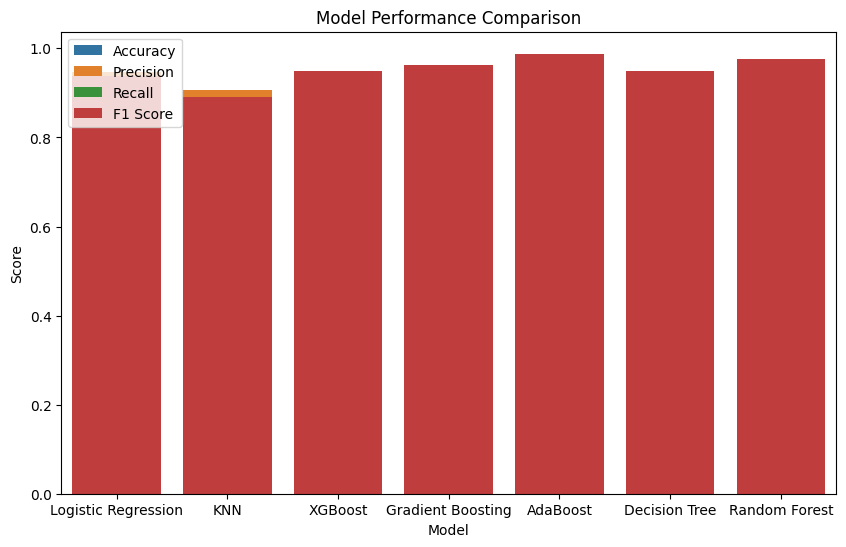

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.9375   0.947581  0.9375  0.938724
1                  KNN    0.8875   0.906850  0.8875  0.890275
2              XGBoost    0.9500   0.950000  0.9500  0.950000
3    Gradient Boosting    0.9625   0.962455  0.9625  0.962304
4             AdaBoost    0.9875   0.987963  0.9875  0.987560
5        Decision Tree    0.9500   0.950000  0.9500  0.950000
6        Random Forest    0.9750   0.975000  0.9750  0.975000


In [ ]:
models = {
    'Logistic Regression': mo,
    'KNN': knn,
    'XGBoost': xg,
    'Gradient Boosting': gra,
    'AdaBoost': ada,
    'Decision Tree': model2,
    'Random Forest': model1,

}

# Function to evaluate a model
def evaluate_model(modelss, x_train, y_train, x_test, y_test):
    modelss.fit(x_train, y_train)
    y_pred = modelss.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate each model and store the results
results = []
for name, modelss in models.items():
    accuracy, precision, recall, f1 = evaluate_model(modelss, x_train, y_train, x_test, y_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a barplot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    sns.barplot(x='Model', y=metric, data=results_df, label=metric)

# Add legend, title, and labels
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.legend(loc='upper left')

# Show the plot
plt.show()
print(results_df)

By, the above analysis , We selected **AdaBoost classifier** as our final model

SAVE THE MODEL IN PICKLE FILE .

In [ ]:
import pickle

pickle.dump(ada,open("mod.pkl",'wb'))